In [1]:
import numpy as np
import pandas as pd
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag

In [2]:
%%time

N_sample = 20000

all_kappa = 10 ** np.linspace(0, 4, 200)
all_stds = []
all_S2 = []

for kappa in all_kappa:

    dec, inc = ipmag.fishrot(k=kappa,
                              n=N_sample, 
                              dec=0, 
                              inc=90, 
                              di_block=False)
    
    angular_std = np.linalg.norm(90 - np.array(inc)) / np.sqrt(len(inc))
    all_stds.append(angular_std)

CPU times: user 12min 9s, sys: 38.3 s, total: 12min 47s
Wall time: 11min 48s


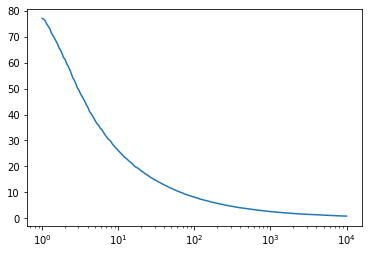

In [4]:
import matplotlib.pyplot as plt

plt.plot(all_kappa, all_stds)
plt.xscale("log")

In [5]:
df = pd.DataFrame({'kappa': all_kappa, 'std_angular': all_stds})
df

,kappa,std_angular
0,1.000000,77.080839
1,1.047371,76.860184
2,1.096986,76.101531
3,1.148951,74.962904
4,1.203378,74.008099
...,...,...
195,8309.941949,0.892254
196,8703.591361,0.869336
197,9115.888300,0.852607
198,9547.716114,0.827642


In [6]:
df.to_csv("kappa2angular.csv")